In [48]:
import numpy as np
import pandas as pd
import random
import math
from sklearn import datasets
import matplotlib.pyplot as plt

In [49]:
boston = datasets.load_boston()
dataDiferente = np.concatenate(([boston.data[:,1]],[boston.data[:,2]]))

In [50]:
data = np.zeros((len(dataDiferente[0]),2))

for dupla in range(len(dataDiferente[0])):
   data[dupla][0] = dataDiferente[0][dupla]
   data[dupla][1] = dataDiferente[1][dupla]

    
k = 3 # Numero de clusters
medias = np.zeros((k,2))
grupos = {}

In [51]:
data

array([[18.  ,  2.31],
       [ 0.  ,  7.07],
       [ 0.  ,  7.07],
       ...,
       [ 0.  , 11.93],
       [ 0.  , 11.93],
       [ 0.  , 11.93]])

In [52]:
def dist(x0, y0, x1, y1):
    a = (x1 - x0)**2 + (y1 - y0)**2
    b = math.sqrt(a)
    return b

In [53]:
#-------------------------------Escolhe os nucleos

for i in range(k):
    ran = random.randint(0,len(data)-1)
    a = "grupo"+str(i+1)
    grupos[a] = [[],[]]
    grupos[a][0].append(ran)
    grupos[a][1] = data[ran][0:2]
    medias[i] = grupos[a][1]
    print(a)

grupo1
grupo2
grupo3


In [54]:
# ------------------------------Classifica
    
for j in range(len(data)):
    x0 = data[j][0]
    y0 = data[j][1]
    distancias = np.zeros((k,1))
    countIndice = 0
#    ------------------------------Verifica se ja existe o indice
    for a in grupos:
        for i in range(len(grupos[a][0])):
            if j == grupos[a][0][i]:
                countIndice += 1
#---------------------------------Calcula a distancia entre todos os grupos
    if countIndice == 0:
        for i in range(k):
            a = "grupo"+str(i+1)
            x1 = grupos[a][1][0]
            y1 = grupos[a][1][1]
            distancias[i] = dist(x0, y0, x1, y1)
       
#--------------------------------De acordo com as distancias adiciona no grupo correspondente
        for x in range(k):
            count = 0
            for y in range(k):
                if(distancias[x]<distancias[y]):
                    count += 1
            if count==2:
                a = "grupo"+str(x+1)
                grupos[a][0].append(j)
                medias[x] +=  data[j][0:2]
                grupos[a][1] = medias[x]/(len(grupos[a][0]))


In [55]:
#-----------------------------Refaz a classificação

for j in range(len(data)):
    x0 = data[j][0]
    y0 = data[j][1]
    distancias = np.zeros((k,1))
    for i in range(k):
        a = "grupo"+str(i+1)
        x1 = grupos[a][1][0]
        y1 = grupos[a][1][1]
        distancias[i] = dist(x0, y0, x1, y1)
    for x in range(k):
         count = 0
         for y in range(k):
             if(distancias[x]<distancias[y]):
                 count += 1
         if count==2:
             a = "grupo"+str(x+1)
             for i in range(len(grupos[a][0])):
                 if j == grupos[a][0][i]:
                     countIndice += 1
             if countIndice == 0:
                 a = "grupo"+str(x+1)
                 grupos[a][0].append(j)
                 medias[x] +=  data[j][0:2]
                 grupos[a][1] = medias[x]/(len(grupos[a][0]))
                 for h in range(k):
                     if h!=x:
                         g ="grupo"+str(h+1)
                         for k in range(len(grupos[g][0])):
                             if j == grupos[g][0][k]:
                                 del(grupos[g][0][k])
                                 break

In [56]:
cls = np.zeros(len(data),dtype=int)

NPC = 0

for a in grupos:
    for i in grupos[a][0]:
        cls[i] = NPC
    NPC+=1

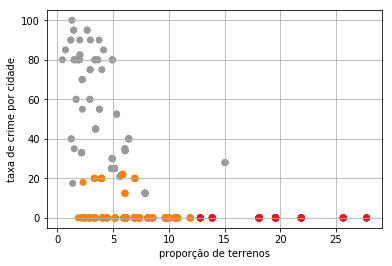

In [60]:
X = data[:, :2]  # as duas primeiras caracteristicas
y = cls
plt.subplots()
plt.scatter(X[:, 1], X[:, 0], c=y, cmap=plt.cm.Set1)
plt.xlabel('proporção de terrenos')
plt.ylabel('taxa de crime por cidade')
plt.grid(True)
plt.show()


In [58]:
cls

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,